# L18 Diabetes
Key ideas: Logistic regression and binomial generalized linear model

Application: Diabetes data

In [65]:
# load libraries
library("MASS")
library("ggplot2")
library("readr")

# plot settings
options(repr.plot.width=4, repr.plot.height=3)

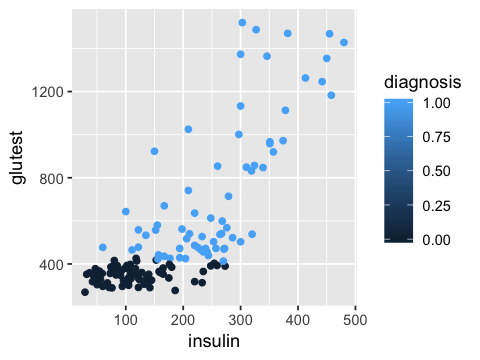

In [66]:
# load diabetes data (See MSMB textbook)

diabetes = read_csv("diabetes.csv",col_names=TRUE, col_types = cols())

diabetes$boolean=(diabetes$group!=3)
diabetes$diagnosis=as.integer(as.logical(diabetes$boolean))

ggplot(mapping = aes(x=insulin,y=glutest)) + geom_point(aes(color=diagnosis), data = diabetes)

In [67]:
diabetes


id,relwt,glufast,glutest,steady,insulin,group,boolean,diagnosis
1,0.81,80,356,124,55,3,FALSE,0
3,0.94,105,319,143,105,3,FALSE,0
5,1.00,90,323,240,143,3,FALSE,0
7,0.91,100,350,221,119,3,FALSE,0
9,0.99,97,379,142,98,3,FALSE,0
11,0.90,91,353,221,53,3,FALSE,0
13,0.96,78,290,136,142,3,FALSE,0
15,0.74,86,312,208,68,3,FALSE,0
17,1.10,90,364,152,76,3,FALSE,0
19,0.83,85,296,116,60,3,FALSE,0


---
Fit the model
$$p(g) = \frac{e^{\beta_0+\beta_1 g}}{1+ e^{\beta_0+\beta_1 g}}$$ 
where $p$ is the probability of positive diagnosis, and $g$ is the variable glutest.

In [68]:
# Fit the binomial model using GLM.
fittedBinomial= glm(diagnosis~glutest,family=binomial,data=diabetes)

fittedBinomial # Show results of GLM fit

beta0 = coef(fittedBinomial)[1]
beta1 = coef(fittedBinomial)[2]

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = diagnosis ~ glutest, family = binomial, data = diabetes)

Coefficients:
(Intercept)      glutest  
   -90.4017       0.2153  

Degrees of Freedom: 143 Total (i.e. Null);  142 Residual
Null Deviance:	    199.2 
Residual Deviance: 11.1 	AIC: 15.1

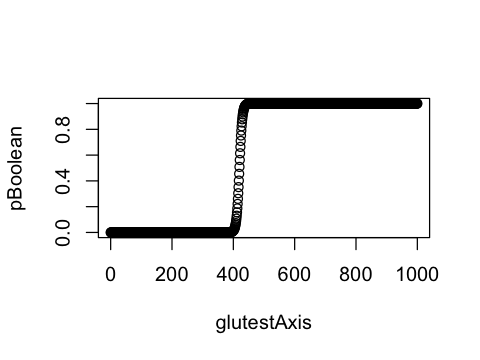

In [69]:
# Plot fit
glutestAxis = seq(0,1000,1)
logit=beta0+beta1*glutestAxis
pDiagnosis = exp(logit)/(1+exp(logit))
plot(glutestAxis,pDiagnosis)

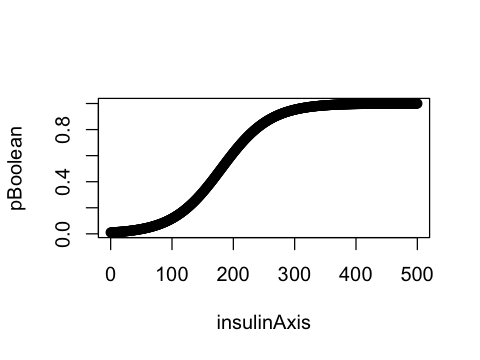

In [73]:
fitToInsulin = glm(diagnosis~insulin,family=binomial,data=diabetes)

beta0 = coef(fitToInsulin)[1]
beta1 = coef(fitToInsulin)[2]

# Plot fit
insulinAxis = seq(0,500,1)
logit=beta0+beta1*insulinAxis
pDiagnosis = exp(logit)/(1+exp(logit))
plot(insulinAxis,pDiagnosis)

In [78]:
glm(diagnosis ~ glutest + insulin,family=binomial,data=diabetes, control = list(maxit = 50))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = diagnosis ~ glutest + insulin, family = binomial, 
    data = diabetes, control = list(maxit = 50))

Coefficients:
(Intercept)      glutest      insulin  
  -5812.981       12.987        2.189  

Degrees of Freedom: 143 Total (i.e. Null);  141 Residual
Null Deviance:	    199.2 
Residual Deviance: 1.169e-09 	AIC: 6

In [79]:
library("rgl")

ERROR: Error in library("rgl"): there is no package called ‘rgl’
